In [1]:
import pandas as pd
import numpy as np

In [2]:
# symboling = rating on how risky the car is in terms of price?
# normalized-losses = normalized loss in terms of price compared to other cars
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
           'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
           'engine-location', 'wheel-base', 'length', 'width', 'height', 
           'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 
           'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
           'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=columns)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# Which columns can used as features for the KNN Regressor?
## wheel-base, length, width, height, curb-weight, engine-size, compression rate, horsepower, city-mpg
## highway-mpg

# Which column(s) can we predict?
## price

In [5]:
# If we want to do predictive modeling, we can't have any missing values. 
# Based on the preview above, we can see that `normalized-losses` has a value of `?` which we can 
## assume it is a null value.

cars.replace("?", np.nan, inplace = True)

In [6]:
# Change normalized-losses, bore, stroke, horsepower, peakrpm, price
## to numeric dtype
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
# cars["num-of-doors"] = cars["num-of-doors"].str.replace("two", "2").str.replace("four", "4")

In [8]:
# lets keep these columns: normalized-losses, bore, stroke, horsepower, peakrpm, price
numeric_cols = ["normalized-losses", "bore", 
                "stroke", "horsepower", "peak-rpm", "price"]

numeric_cars = cars.copy()
numeric_cars[numeric_cols] = numeric_cars[numeric_cols].astype(float)

In [9]:
numeric_cars.isnull().sum()
# since we are predicting price, let's drop the null values in there

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
numeric_cars.dropna(subset=["price"], inplace = True)

In [11]:
numeric_cars.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [12]:
# Let's fill in the rest of the null values with the mean
numeric_cars.fillna(numeric_cars.mean(), inplace=True)

In [13]:
numeric_cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [15]:
# Normalizing all the numeric columns/features so one column doesn't have more of an impact than another 
norm_numeric_cols = ["symboling", "normalized-losses", "wheel-base", "length", "width", "height", "curb-weight",
                     "engine-size", "bore", "stroke", "compression-rate", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]

numeric_cars[norm_numeric_cols] = numeric_cars[norm_numeric_cols] / numeric_cars[norm_numeric_cols].max()

In [16]:
numeric_cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.000000,0.476562,alfa-romero,gas,std,two,convertible,rwd,front,0.732837,...,0.398773,mpfi,0.880711,0.642686,0.391304,0.423664,0.757576,0.428571,0.500000,13495.0
1,1.000000,0.476562,alfa-romero,gas,std,two,convertible,rwd,front,0.732837,...,0.398773,mpfi,0.880711,0.642686,0.391304,0.423664,0.757576,0.428571,0.500000,16500.0
2,0.333333,0.476562,alfa-romero,gas,std,two,hatchback,rwd,front,0.781638,...,0.466258,mpfi,0.680203,0.832134,0.391304,0.587786,0.757576,0.387755,0.481481,16500.0
3,0.666667,0.640625,audi,gas,std,four,sedan,fwd,front,0.825476,...,0.334356,mpfi,0.809645,0.815348,0.434783,0.389313,0.833333,0.489796,0.555556,13950.0
4,0.666667,0.640625,audi,gas,std,four,sedan,4wd,front,0.822167,...,0.417178,mpfi,0.809645,0.815348,0.347826,0.438931,0.833333,0.367347,0.407407,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.333333,0.371094,volvo,gas,std,four,sedan,rwd,front,0.902399,...,0.432515,mpfi,0.959391,0.755396,0.413043,0.435115,0.818182,0.469388,0.518519,16845.0
201,-0.333333,0.371094,volvo,gas,turbo,four,sedan,rwd,front,0.902399,...,0.432515,mpfi,0.959391,0.755396,0.378261,0.610687,0.803030,0.387755,0.462963,19045.0
202,-0.333333,0.371094,volvo,gas,std,four,sedan,rwd,front,0.902399,...,0.530675,mpfi,0.908629,0.688249,0.382609,0.511450,0.833333,0.367347,0.425926,21485.0
203,-0.333333,0.371094,volvo,diesel,turbo,four,sedan,rwd,front,0.902399,...,0.444785,idi,0.763959,0.815348,1.000000,0.404580,0.727273,0.530612,0.500000,22470.0


In [17]:
# Starting with univariate k-nearest neighbors models
# We'll get familiar with the workflow with a simple model and then go on to more complex ones

# Start off by creating a function that encapsulates the training and simple validation process

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, test_col, df):
    
    knn = KNeighborsRegressor(n_neighbors=5, algorithm="brute")
    np.random.seed(1)
    
    # Randomize the rows of df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Get len of df so we can split it into 2 equal halves
    half_df = rand_df.shape[0] // 2
    
    # First half of df
    train_df = rand_df.iloc[:half_df].copy()
    # Second half of df
    test_df = rand_df.iloc[half_df:].copy()
    
    # Train model
    knn.fit(train_df[[train_col]], train_df[test_col])
    
    # Test model
    predictions = knn.predict(test_df[[train_col]])
    
    # Get root square mean error (RSME). Shows how "off" our model is. We want this to be as low as possible.
    rmse = np.sqrt(mean_squared_error(test_df[test_col], predictions))
    
    return rmse

In [18]:
rmse_values = {}
for col in norm_numeric_cols:
    rmse = knn_train_test(col, "price", numeric_cars)
    
    rmse_values[col] = rmse
    

    

In [19]:
pd.Series(rmse_values).sort_values()

engine-size          3277.351161
horsepower           3996.526243
curb-weight          4394.981287
width                4592.447681
highway-mpg          4865.786357
city-mpg             4938.438254
length               5425.276989
wheel-base           5539.707580
compression-rate     6287.560992
bore                 6940.213174
peak-rpm             7234.028377
normalized-losses    7332.053776
height               7774.778037
symboling            7933.038788
stroke               7998.379796
dtype: float64

In [20]:
# Let's add a k parameter, representing the number of neighbors in the model

def knn_train_test(train_col, test_col, k, df):
    
    knn = KNeighborsRegressor(n_neighbors=k, algorithm="brute")
    np.random.seed(1)
    
    # Randomize the rows of df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Get len of df so we can split it into 2 equal halves
    half_df = rand_df.shape[0] // 2
    
    # First half of df
    train_df = rand_df.iloc[:half_df].copy()
    # Second half of df
    test_df = rand_df.iloc[half_df:].copy()
    
    # Train model
    knn.fit(train_df[[train_col]], train_df[test_col])
    
    # Test model
    predictions = knn.predict(test_df[[train_col]])
    
    # Get root square mean error (RSME). Shows how "off" our model is. We want this to be as low as possible.
    rmse = np.sqrt(mean_squared_error(test_df[test_col], predictions))
    
    return rmse


k_rmse_values = {}
k_values = [1,3,5,7,9]

for col in norm_numeric_cols:
    col_dict = {}
    for v in k_values:
        rmse = knn_train_test(col, "price", v, numeric_cars)
        col_dict[v] = rmse
    k_rmse_values[col] = col_dict


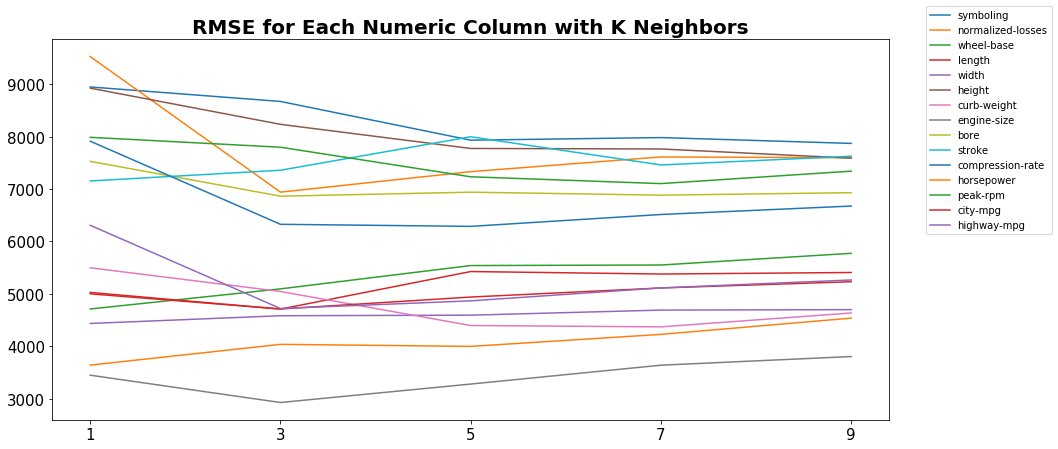

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot(111)

rmse_k13579 = pd.DataFrame(k_rmse_values)

ax.plot(rmse_k13579)
ax.legend(rmse_k13579.columns, bbox_to_anchor=(1.2, 1.1))

plt.xticks(np.arange(1,10,2), np.arange(1,10,2))

plt.title("RMSE for Each Numeric Column with K Neighbors", fontdict={"fontsize":20,"fontweight":"bold"})
plt.tick_params(labelsize=15)


plt.show()

In [22]:
rmse_k13579[rmse_k13579 < 5000].mean().sort_values().head()
# Top 5 features according to the RMSEw

engine-size    3417.851440
horsepower     4086.428954
curb-weight    4466.078581
width          4599.117213
length         4708.377653
dtype: float64

## Multivariate K-Nearest Neighbors

In [23]:
# Now we will modify the function to take in multiple columns so we can do build a multivariate KNN.

def knn_train_test(train_cols, test_col, k, df):
    
    knn = KNeighborsRegressor(n_neighbors=k, algorithm="brute")
    np.random.seed(1)
    
    # Randomize the rows of df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Get len of df so we can split it into 2 equal halves
    half_df = rand_df.shape[0] // 2
    
    # First half of df
    train_df = rand_df.iloc[:half_df].copy()
    # Second half of df
    test_df = rand_df.iloc[half_df:].copy()
    
    # Train model
    knn.fit(train_df[train_cols], train_df[test_col])
    
    # Test model
    predictions = knn.predict(test_df[train_cols])
    
    # Get root square mean error (RSME). Shows how "off" our model is. We want this to be as low as possible.
    rmse = np.sqrt(mean_squared_error(test_df[test_col], predictions))
    
    return rmse


top_5 = ["engine-size", "horsepower", "curb-weight", "width", "length"]

i = 2
multi_rmse = {}
k_neighbor = 5

for x in range(len(top_5)-1):
    rmse = knn_train_test(top_5[:i], "price", k_neighbor, numeric_cars)
    multi_rmse[i] = rmse
    i += 1

In [24]:
multi_rmse

{2: 2949.286088342582,
 3: 3352.0766033095733,
 4: 3368.6015941042924,
 5: 3226.0853259480027}

We can see that the top 2, top 3, and top 5 features, it produced the lowest RMSE. 
Now let's experiment with the number of k neighbors. (1 to 25).

In [25]:
top3_mod_rmse = {}
top_num_features = [2,3,5]

for x in top_num_features:
    mod_dict = {}
    for k in range(1,26):
        rmse = knn_train_test(top_5[:x], "price", k, numeric_cars)
        mod_dict[k] = rmse
    top3_mod_rmse[x] = mod_dict
        
    
    

In [26]:
best_k_values = {}
for model in top3_mod_rmse:
    min_k = min(top3_mod_rmse[model], key=top3_mod_rmse[model].get)
    best_k_values[model] = min_k
    
best_k_values

{2: 2, 3: 2, 5: 2}

In [27]:
# Check answer
# yes k=2 returns the lowest RMSE
top3_mod_rmse[3]

{1: 3049.794864064022,
 2: 2977.3794752439535,
 3: 3016.156963485627,
 4: 3163.2385136412286,
 5: 3352.0766033095733,
 6: 3507.8634426197673,
 7: 3708.0248530410167,
 8: 3910.860073327829,
 9: 3986.8077463499776,
 10: 4064.837595369915,
 11: 4140.87533503479,
 12: 4137.786866756548,
 13: 4177.780424677393,
 14: 4286.849325362542,
 15: 4333.4166543753945,
 16: 4402.194197786809,
 17: 4474.598484667956,
 18: 4506.97935298317,
 19: 4567.333650044232,
 20: 4590.008395123257,
 21: 4602.199837627327,
 22: 4635.636955465541,
 23: 4694.877223424584,
 24: 4719.918558970491,
 25: 4788.359239753702}

In [28]:
for model in top3_mod_rmse:
    print("Top {} features: {}".format(model, top3_mod_rmse[model][2]))


Top 2 features: 2695.543262994172
Top 3 features: 2977.3794752439535
Top 5 features: 2710.14537031094


We can see that **k = 2** is the optimal value for all the models, which include the top 2, top 3, and top 5 features. The top features are: 
1. `engine-size`
2. `horsepower`
3. `curb-weight`
4. `width`
5. `length`

The RMSE values are as follows: 

| num_features | RMSE |
| --- | --- |
| 2 | 2695.54 |
| 3 | 2977.38 |
| 5 | 2710.15 |

So, we can conclude that to produce the most accurate model based on the RMSE values, we should include only the `engine-size` and `horsepower`. In other words, these two features of a car best represent the price of a car.

## K-Fold Cross Validation

The general procedure of the K-Fold Cross Validation is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
    - Summarize the skill of the model using the sample of model evaluation scores
    
This is another way to assess the accuracy of you model besides the test/train validation. 

In [29]:
from sklearn.model_selection import cross_val_score, KFold

In [30]:
def knn_kfold(train_cols, test_col, folds, df):
    
    kf = KFold(folds, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=2, algorithm="brute")
#     np.random.seed(1)
    rmses_list = []
    mses = cross_val_score(knn,
                           df[train_cols],
                           df[test_col],
                           scoring = "neg_mean_squared_error",
                           cv = kf)
    rmses = np.sqrt(np.absolute(mses))
    rmses_list.append(rmses)
    
    
    return np.mean(rmses_list), np.std(rmses_list)
    
    
    
# #     # Randomize the rows of df
# #     shuffled_index = np.random.permutation(df.index)
# #     rand_df = df.reindex(shuffled_index)
    
# #     # Get len of df so we can split it into 2 equal halves
# #     half_df = rand_df.shape[0] // 2
    
# #     # First half of df
# #     train_df = rand_df.iloc[:half_df].copy()
# #     # Second half of df
# #     test_df = rand_df.iloc[half_df:].copy()
    
#     # Train model
#     knn.fit(train_df[train_cols], train_df[test_col])
    
#     # Test model
#     predictions = knn.predict(test_df[train_cols])
    
#     # Get root square mean error (RSME). Shows how "off" our model is. We want this to be as low as possible.
#     rmse = np.sqrt(mean_squared_error(test_df[test_col], predictions))
    
#     return rmse

In [31]:
# based on the top 2, 3, and 5 features, we have found out the most accurate k neighbor is 2
# now we can test our model even further and see how many folds yields the most accurate feature/features that predict 
# the price
top_5 = ["engine-size", "horsepower", "curb-weight", "width", "length"]
top_num_features = [2,3,5]

models = {}

for x in top_num_features:
    k_folds = {}
    for f in range(2,26):
        mean, std = knn_kfold(top_5[:x], "price", f, numeric_cars)
        k_folds[f] = [mean, std]
    models[x] = k_folds

In [32]:
top_2_kf = pd.DataFrame(models[2]).transpose()
top_3_kf = pd.DataFrame(models[3]).transpose()
top_5_kf = pd.DataFrame(models[5]).transpose()

top_2_kf.reset_index(inplace=True)
top_3_kf.reset_index(inplace=True)
top_5_kf.reset_index(inplace=True)

In [33]:
top_2_kf.columns = ["k_folds", "mean", "std"]
top_3_kf.columns = ["k_folds", "mean", "std"]
top_5_kf.columns = ["k_folds", "mean", "std"]

In [34]:
min_mean_2 = top_2_kf[top_2_kf["mean"] == top_2_kf["mean"].min()]
min_std_2 = top_2_kf[top_2_kf["std"] == top_2_kf["std"].min()]

min_mean_3 = top_3_kf[top_3_kf["mean"] == top_3_kf["mean"].min()]
min_std_3 = top_3_kf[top_2_kf["std"] == top_3_kf["std"].min()]

min_mean_5 = top_5_kf[top_5_kf["mean"] == top_5_kf["mean"].min()]
min_std_5 = top_5_kf[top_5_kf["std"] == top_5_kf["std"].min()]


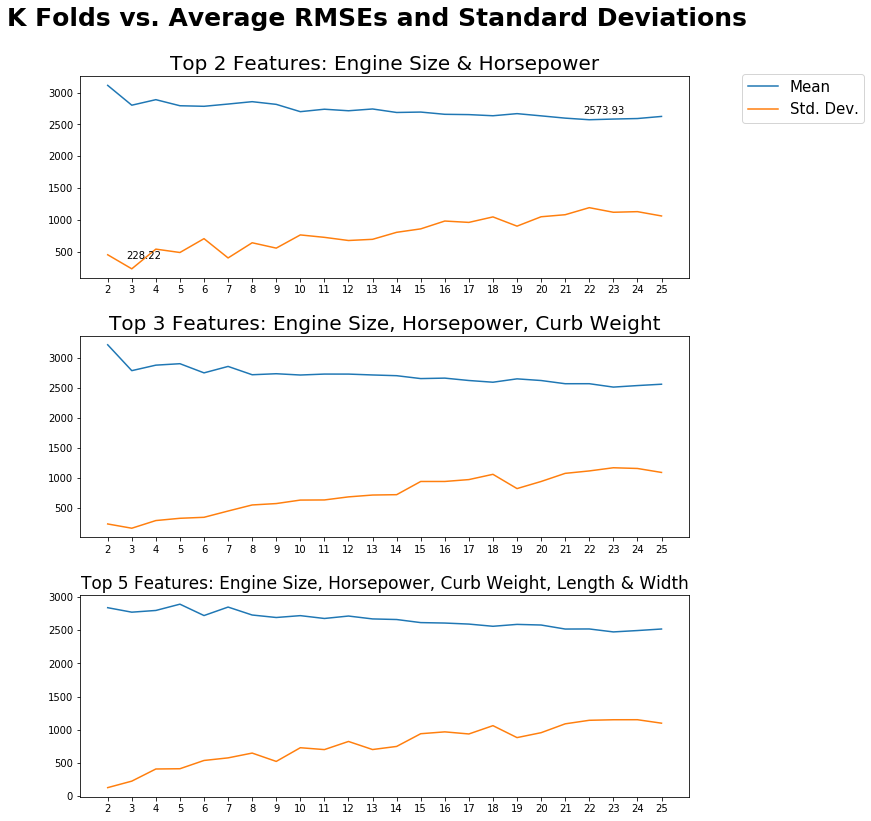

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,12))
fig.suptitle('K Folds vs. Average RMSEs and Standard Deviations', fontsize=25, fontweight="bold")
fig.tight_layout(pad=4)

ax1.plot(top_2_kf["k_folds"], top_2_kf["mean"], label="Mean")
ax1.plot(top_2_kf["k_folds"], top_2_kf["std"], label="Std. Dev.")
ax1.set_xticks(np.arange(2,26))
ax1.text(min_mean_2["k_folds"]-.25, 
         min_mean_2["mean"]+100, 
         min_mean_2["mean"].values[0].round(2))
ax1.text(min_std_2["k_folds"]-0.25, 
         min_std_2["std"]+150, 
         min_std_2["std"].values[0].round(2))

ax2.plot(top_3_kf["k_folds"], top_3_kf[["mean", "std"]])
ax2.set_xticks(np.arange(2,26))

ax3.plot(top_5_kf["k_folds"], top_5_kf[["mean", "std"]])
ax3.set_xticks(np.arange(2,26))

ax1.set_title("Top 2 Features: Engine Size & Horsepower", fontsize=20)
ax2.set_title("Top 3 Features: Engine Size, Horsepower, Curb Weight", fontsize=20)
ax3.set_title("Top 5 Features: Engine Size, Horsepower, Curb Weight, Length & Width", fontsize=17)


ax1.legend(bbox_to_anchor=(1.3, 1.05), fontsize=15)

plt.subplots_adjust(top=0.90)




# plt.xticks(np.arange(0,24), np.arange(2,26))

plt.show()

Based on the graphs above, we can determine which features, what number k to use for the nearest neighbors, and how many folds to perform on the dataset to get the most accurate model. In an ideal situation, we would want the lowest mean and the lowest standard deviation (lowest bias and variance) between our averages. 

Based on the graphs, I would recommend either 3 or 7 folds with the top 2 features, given the k value for the nearest neighbors is 2. 

# Conclusion

In this guided project, we predicted car prices based on numerous features using a univariate model and multivariate model. The top features that resulted in the most accurate price for the cars included `engine-size`, `horsepower`, `curbweight`, `length`, and `width`, respectively. 

We found that with the top 2 features (`engine size` and `horsepower`), a k-value of 2 for the nearest neighbors, and a k-fold value of either 3 or 7, yielded the most accurate prices of each car, with a RMSE of 2802.69 or 2820.84, respectively.